# Welcome to my Python 101

In [11]:
i=1
print(i)

1


Let us try to put a formulla like $phi = K_P \cdot p$

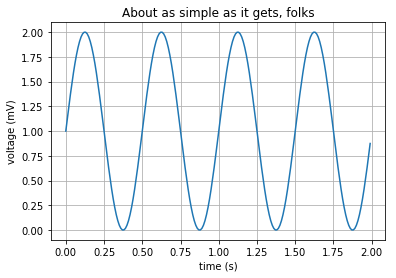

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(4 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## Interpolate

 - this
 - is
 - a
 - list

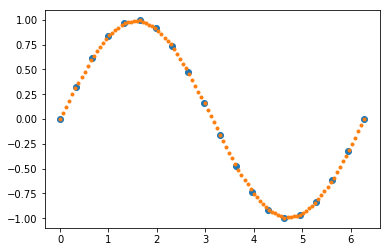

In [4]:
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
yp = None
xi = np.linspace(x[0], x[-1], 100)
yi = np.interp(xi, x, y, yp)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xi, yi, '.')
plt.show()

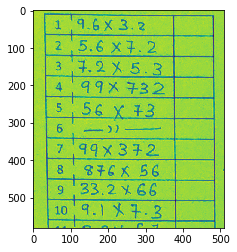

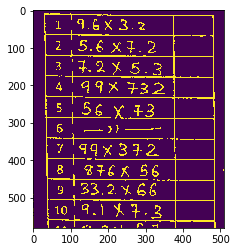

In [56]:
import cv2


img = cv2.imread("test3.jpg", 0)


(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
img_bin = 255-img_bin 

plt.imshow(img)
plt.show()

plt.imshow(img_bin)
plt.show()



Now detect the boxes

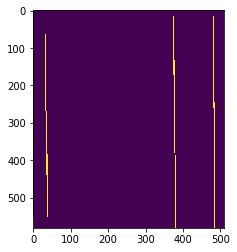

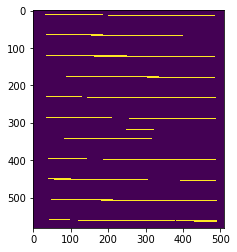

In [57]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//25
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)


plt.imshow(verticle_lines_img)
plt.show()
plt.imshow(horizontal_lines_img)
plt.show()


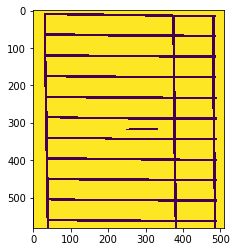

In [58]:
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(img_final_bin)
plt.show()

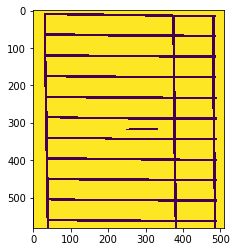

In [55]:
# Find contours for image, which will detect all the boxes
im2, contours = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
#(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

plt.imshow(img_final_bin)
plt.show()